# Not playoff squares data analysis
Do total points scored and allowed per game, total yards and allowed per game, times covered the spread

Show results based on all playoff data, as well as from 2000 and on only (modern era)

## Imports and Read Data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("playoff_data.csv", index_col=False)
df.head()

,Away,Home,Away score,Home score,Line,Over/Under,Away Rushing,Home Rushing,Away Passing,Home Passing
0,Green Bay Packers,Dallas Cowboys,34,27,Green Bay Packers -7.0,-1,102,187,28,31
1,Kansas City Chiefs,Green Bay Packers,10,35,Green Bay Packers -14.0,0.0 (over),72,130,32,24
2,Kansas City Chiefs,Buffalo Bills,31,7,Kansas City Chiefs -3.5,-1,113,40,24,27
3,Los Angeles Rams,Green Bay Packers,7,28,Los Angeles Rams -3.0,-1,75,163,31,23
4,Cleveland Browns,Dallas Cowboys,14,52,Dallas Cowboys -5.0,-1,159,178,30,15


## Create Over/Under dataFrame

In [3]:
ou_df = df[["Away", "Home", "Away score", "Home score", "Over/Under"]]
ou_df["Over/Under"].unique()

array(['-1', '0.0 (over)', '43.0 (over)', '40.0 (under)', '39.0 (under)',
       '36.0 (under)', '34.0 (under)', '33.0 (under)', '36.0 (over)',
       '38.0 (over)', '37.0 (over)', '46.0 (over)', '38.0 (under)',
       '41.0 (under)', '45.0 (over)', '43.0 (under)', '37.5 (under)',
       '33.0 (over)', '31.5 (over)', '41.0 (over)', '45.0 (under)',
       '42.0 (over)', '48.0 (under)', '37.5 (over)', '44.5 (under)',
       '38.5 (over)', '46.5 (over)', '44.5 (over)', '53.0 (over)',
       '43.5 (under)', '48.0 (over)', '53.0 (under)', '38.5 (under)',
       '36.5 (over)', '44.0 (under)', '45.5 (under)', '44.0 (over)',
       '48.5 (over)', '47.0 (under)', '51.0 (under)', '53.5 (over)',
       '45.0 (push)', '40.5 (under)', '40.0 (over)', '39.0 (over)',
       '34.0 (over)', '47.0 (over)', '46.0 (under)', '38.0 (push)',
       '37.0 (under)', '35.0 (under)', '32.0 (under)', '35.0 (over)',
       '33.5 (over)', '41.5 (over)', '50.0 (under)', '35.5 (under)',
       '32.5 (over)', '52.0 (ov

### Clean df

In [4]:
ou_df = ou_df[(ou_df["Over/Under"] != "-1") & (ou_df["Over/Under"] != "0.0 (over)")]
ou_df["O/U Result"] = ou_df.apply(lambda row: row["Over/Under"].split()[1].replace("(", "").replace(")", ""), axis=1)
ou_df["Over/Under"] = ou_df.apply(lambda row: float(row["Over/Under"].split()[0]), axis=1)
ou_df

,Away,Home,Away score,Home score,Over/Under,O/U Result
6,Oakland Raiders,Green Bay Packers,14,33,43.0,over
11,New York Jets,Baltimore Colts,16,7,40.0,under
17,Minnesota Vikings,Kansas City Chiefs,7,23,39.0,under
27,Dallas Cowboys,Baltimore Colts,13,16,36.0,under
34,Miami Dolphins,Dallas Cowboys,3,24,34.0,under
...,...,...,...,...,...,...
529,Cleveland Browns,Kansas City Chiefs,17,22,55.5,under
530,Tampa Bay Buccaneers,New Orleans Saints,30,20,53.0,under
531,Buffalo Bills,Kansas City Chiefs,24,38,55.0,over
532,Tampa Bay Buccaneers,Green Bay Packers,31,26,53.0,over


In [5]:
ou_df["O/U Result"].value_counts()

over     227
under    220
push       5
Name: O/U Result, dtype: int64

### Histogram

(array([ 2.,  4., 13., 10.,  7., 13., 28., 35., 21., 20., 36., 21., 29.,
        28., 26., 29., 26., 27.,  8., 11., 13., 13., 10.,  7.,  7.,  4.,
         2.,  0.,  2.]),
 array([31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58., 59., 60.]),
 <BarContainer object of 29 artists>)

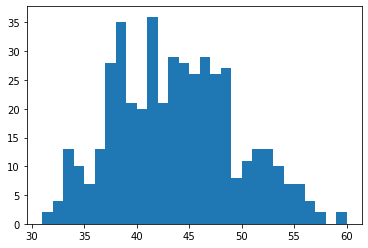

In [6]:
data = ou_df["Over/Under"]
min_val = min(data)
max_val = max(data)
val_range = max_val - min_val

plt.hist(data, bins=int(val_range))

### Calculate the average margin of error from the line

In [7]:
pass

## Create MoneyLine dataFrame

In [27]:
ml_df = df[["Away", "Home", "Away score", "Home score", "Line"]]
ml_df

,Away,Home,Away score,Home score,Line
0,Green Bay Packers,Dallas Cowboys,34,27,Green Bay Packers -7.0
1,Kansas City Chiefs,Green Bay Packers,10,35,Green Bay Packers -14.0
2,Kansas City Chiefs,Buffalo Bills,31,7,Kansas City Chiefs -3.5
3,Los Angeles Rams,Green Bay Packers,7,28,Los Angeles Rams -3.0
4,Cleveland Browns,Dallas Cowboys,14,52,Dallas Cowboys -5.0
...,...,...,...,...,...
529,Cleveland Browns,Kansas City Chiefs,17,22,Kansas City Chiefs -7.5
530,Tampa Bay Buccaneers,New Orleans Saints,30,20,New Orleans Saints -2.5
531,Buffalo Bills,Kansas City Chiefs,24,38,Kansas City Chiefs -3.0
532,Tampa Bay Buccaneers,Green Bay Packers,31,26,Green Bay Packers -3.0


### Create 2 new columns: Home Cover, Away Cover

All lines are - except for "pick" (convert "pick" to -0.0)

In [28]:
ml_df["Line"].unique()

array(['Green Bay Packers -7.0', 'Green Bay Packers -14.0',
       'Kansas City Chiefs -3.5', 'Los Angeles Rams -3.0',
       'Dallas Cowboys -5.0', 'Green Bay Packers -13.5',
       'Oakland Raiders -10.0', 'Dallas Cowboys -3.0',
       'Baltimore Colts -11.0', 'Baltimore Colts -6.0',
       'Baltimore Colts -18.0', 'New York Jets -2.0',
       'Minnesota Vikings -7.0', 'Dallas Cowboys -7.0',
       'Minnesota Vikings -8.0', 'Minnesota Vikings -12.0',
       'Kansas City Chiefs -2.5', 'Oakland Raiders -13.0',
       'Oakland Raiders -5.0', 'Baltimore Colts -7.0',
       'Detroit Lions -3.0', 'Oakland Raiders -6.0',
       'Oakland Raiders -1.5', 'San Francisco 49ers -4.0',
       'Baltimore Colts -2.5', 'Dallas Cowboys -1.0',
       'Kansas City Chiefs -3.0', 'Baltimore Colts -4.0',
       'San Francisco 49ers -5.5', 'Miami Dolphins -1.0',
       'Dallas Cowboys -6.0', 'Pick', 'Pittsburgh Steelers -2.0',
       'Miami Dolphins -12.5', 'Washington Redskins -5.0',
       'Miami Dolphins

In [100]:
# create new columns for analysis
ml_df["Away Cover"] = -1
ml_df["Home Cover"] = -1
ml_df.head(40)

,Away,Home,Away score,Home score,Line,Away Cover,Home Cover
0,Green Bay Packers,Dallas Cowboys,34,27,Green Bay Packers -7.0,-1,-1
1,Kansas City Chiefs,Green Bay Packers,10,35,Green Bay Packers -14.0,-1,-1
2,Kansas City Chiefs,Buffalo Bills,31,7,Kansas City Chiefs -3.5,-1,-1
3,Los Angeles Rams,Green Bay Packers,7,28,Los Angeles Rams -3.0,-1,-1
4,Cleveland Browns,Dallas Cowboys,14,52,Dallas Cowboys -5.0,-1,-1
5,Dallas Cowboys,Green Bay Packers,17,21,Green Bay Packers -7.0,-1,-1
6,Oakland Raiders,Green Bay Packers,14,33,Green Bay Packers -13.5,-1,-1
7,Houston Oilers,Oakland Raiders,7,40,Oakland Raiders -10.0,-1,-1
8,Dallas Cowboys,Cleveland Browns,20,31,Dallas Cowboys -3.0,-1,-1
9,Minnesota Vikings,Baltimore Colts,14,24,Baltimore Colts -11.0,-1,-1


In [131]:
def whoCovered(df):
    for i in range(len(df)):
        line = df.loc[i]["Line"]
        away_team = df.loc[i]["Away"]
        
        if(line != "Pick"):
            split_arr = line.split(" -")
            favorite = split_arr[0]   # string of team name
            spread = float(split_arr[1])
            
            # determine under-dog score vs (favorite-spread)
            if(favorite == away_team):
                home_bool = False # tracks if home or away is favorite
                favorite_score = df.loc[i]["Away score"]
                under_dog_score = df.loc[i]["Home score"]
            
            else:
                home_bool = True
                favorite_score = df.loc[i]["Home score"]
                under_dog_score = df.loc[i]["Away score"]
                
        elif(line == "Pick"):
            spread = 0
            favorite_score = df.loc[i]["Home score"]
            under_dog_score = df.loc[i]["Away score"]
            home_bool = True
        
        adjusted = favorite_score - spread
        print(f"Favorite: {favorite}")
        print(f"Favorite score: {favorite_score} vs Under-dog score: {under_dog_score}")
        # return result
        
        """Set column value to cover/loss or push/push or loss/cover"""
        if(adjusted == under_dog_score):  # push
            result = "push"
        elif(adjusted > under_dog_score): # cover
            result = "cover"
        else:                       # loss
            result = "loss"
            
        print(f"Result: {result}") 
        print()
    
    return

In [128]:
test_df = ml_df[:5]
whoCovered(test_df)

Favorite: Green Bay Packers
Favorite score: 34 vs Under-dog score: 27
Result: push

Favorite: Green Bay Packers
Favorite score: 35 vs Under-dog score: 10
Result: cover

Favorite: Kansas City Chiefs
Favorite score: 31 vs Under-dog score: 7
Result: cover

Favorite: Los Angeles Rams
Favorite score: 7 vs Under-dog score: 28
Result: loss

Favorite: Dallas Cowboys
Favorite score: 52 vs Under-dog score: 14
Result: cover



In [130]:
whoCovered(ml_df[:40])

Favorite: Green Bay Packers
Favorite score: 34 vs Under-dog score: 27
Result: push

Favorite: Green Bay Packers
Favorite score: 35 vs Under-dog score: 10
Result: cover

Favorite: Kansas City Chiefs
Favorite score: 31 vs Under-dog score: 7
Result: cover

Favorite: Los Angeles Rams
Favorite score: 7 vs Under-dog score: 28
Result: loss

Favorite: Dallas Cowboys
Favorite score: 52 vs Under-dog score: 14
Result: cover

Favorite: Green Bay Packers
Favorite score: 21 vs Under-dog score: 17
Result: loss

Favorite: Green Bay Packers
Favorite score: 33 vs Under-dog score: 14
Result: cover

Favorite: Oakland Raiders
Favorite score: 40 vs Under-dog score: 7
Result: cover

Favorite: Dallas Cowboys
Favorite score: 20 vs Under-dog score: 31
Result: loss

Favorite: Baltimore Colts
Favorite score: 24 vs Under-dog score: 14
Result: loss

Favorite: Baltimore Colts
Favorite score: 34 vs Under-dog score: 0
Result: cover

Favorite: Baltimore Colts
Favorite score: 7 vs Under-dog score: 16
Result: loss

Favor